# Aprendizaje de maquinas  -- R -- Modelado de tópicos
Notas de clase sobre aprendizaje de maquinas usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre regresión logistica usando **R** en el contexto de aprendizaje de maquinas. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

> Haga clic [aquí](https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-1-base.ipynb) para ver el tutorial de visualización y gráficas.

#### Contenido

>* [Introducción](#Introducción)
* [LDA](#LDA)
    * [Especificación  y estimación del modelo](#Especificación-y-estimación-del-modelo)
* [Aplicación 1](#Aplicación-1)
* [Aplicación 2](#Aplicación-2)



**Bibliografía**.

> 

**Material complementario.**
> Webinar RStudio [Getting your data into R](https://www.rstudio.com/resources/webinars/getting-your-data-into-r/) 

---



# Introducción
[Contenido](#Contenido)

El modelado de tópicos es un área relativamente reciente que se originó en los campos de procesamiento del lenguaje natural y la recuperación de información, pero tambien ha sido aplicado en una serie de otros dominios. Muchos problemas de  clasificación, como el análisis del sentimientos, implican asignar una sola clase a una observación particular por otra parte, en el modelado de tópicos la idea es asignar una mezcla de diferentes clases a una observación.

Básicamente en este tipo de problema, se tiene un conjunto de características y un conjunto de variables ocultas o latentes que generan estas características. Crucialmente, cada observación en el conjunto datos contiene características que se han generado a partir de una mezcla de un subconjunto de estas variables ocultas. Por ejemplo, un ensayo, un sitio web o un artículo de prensa puede tener un tema central como la política, pero también puede incluir uno o más elementos de otros temas, como los derechos humanos, la historia o la economía.

El modelado de tópicos es utilizado de diferentes maneras en la minería de texto. Una posible aplicación es agrupar documentos similares, basados en su tema más predominante, que finalmente, se puede ver como una forma de agrupación. Donde se estudia la composición del tema, las palabras más frecuentes, así como el tamaño relativo de los grupos que se obtienen, y finalmente se resume la información sobre una colección particular de documentos. 



# LDA
[Contenido](#Contenido)

Hay dos métodos de aprendizaje automático con las iniciales LDA:
    1. Asignación de Dirichlet latente, que es un método de modelado
    2. Análisis discriminante lineal, que es un método de clasificación
    
No tienen relación, excepto por el hecho de que las iniciales LDA pueden referirse a cualquiera.

LDA pertenece a una clase de modelos que son llamados modelos generativos ya que tienen una especie de fábula, 
que explica cómo se generaron los datos. Esta historia es generativa a una simplificación de la realidad, por supuesto,
para hacer más fácil el aprendizaje de la máquina. En primer lugar crear temas mediante la asignación de los pesos 
de probabilidad a las palabras. cada tema será asignar diferentes pesos a diferentes palabras.

El método usado para ajustar los modelos es el VEM (Variational Expectation-Maximization). Tanto R como Python utilizan este método en sus algoritmos.

## Especificación  y estimación del modelo
[Contenido](#Contenido)

Se tiene un número de tópicos $k$ fijado a-priori. El modelo LDA asume que para un documento $w=(w_1,...,w_N)$ de un corpus $D$ que contiene $N$ palabras de un vocabulario con $V$ términos, $w_i \in \{1,...,V\}$ para todo $i=1,...,N$.

1. El término de distribución $\beta$ es determinado para cada tópico por:$\beta \sim Dirichlet(\delta)$
2. Las proporciones $\theta$ del tópico de distibución para el documento $w$ son determinadas por: $\theta \sim Dirichlet(\alpha)$
3. Para cada una de la $N$ palabras $w_i$:
    + Escoja un tópico $z_i \sim Multinomial(\theta)$
    + Escoja una palabra $w_i$ desde una distribución de probabilidad multinomial condicionada en el tópico $z_i: p(w_i|z_i , \beta)$

$\beta$ es el término de distribución de tópicos y contiene la probabilidad de que una palabra ocurra en un tópico dado.

<p>Para estimar el modelo LDA se realiza el proceso de estimación de máxima verosimilitud (MLE - Maximum Likelihood Estimation). La suma del logaritmo de las similitudes de todos los documentos se maximiza con respecto a los parámetros $\alpha$ y $\beta$. En este caso $\beta$ es el parámetro de interés. Para un documento $w \in D$, la estimación está dada por:

<img src="images/topicmodel.png" width=500>

# Aplicación 1
[Contenido](#Contenido)


Los datos corresponden a la Primera Conferencia de Recuperación de Texto (TREC-1) 1992. Es un objeto de la clase `DocumentTermMatrix` proporcionado por el paquete `tm`. Es una matriz que consta de documento-término y contiene 10473 términos en 2246 documentos.

> [` LDA{topicmodels}`](https://cran.r-project.org/web/packages/topicmodels/topicmodels.pdf) 

In [1]:
## Instale y cargue las siguientes librerías
library(topicmodels)

Warning message:
: package 'topicmodels' was built under R version 3.3.2

In [2]:
## Lectura de los datos
data("AssociatedPress",             # Nombre de la base de datos 
         package = "topicmodels")   # Paquete donde extrae los datos


In [3]:
## Modelo de temas utilizando LDA
LDA <- LDA(AssociatedPress, 
           k = 5)

AssociatedPress$nrow             # Número de documentos 

[1] 2246

In [4]:
## Temas a los que pertenece los doc.
head(topics(LDA))
tail(topics(LDA))

[1] 5 3 5 5 5 1

[1] 3 2 2 5 5 4

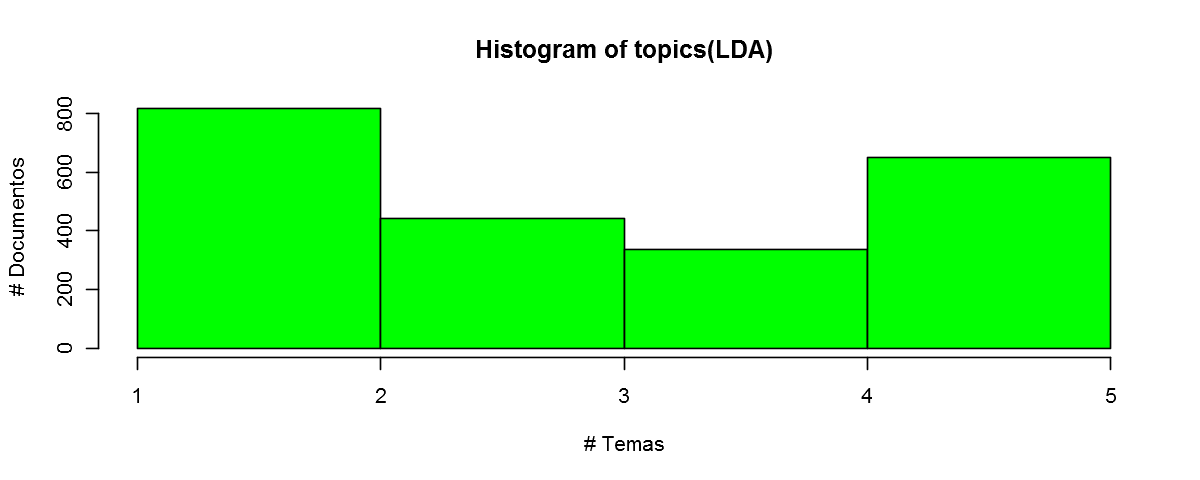

In [10]:
## Histograma de frecuencia
options(repr.plot.width=10, repr.plot.height=4)

hist(topics(LDA),                         # Datos
     breaks=5,                           # Particiones
     xlab="# Temas",                      # Nombre del eje x 
     ylab="# Documentos",                 # Nombre del eje y
     col="green")                         # Color de las barras 

El $\alpha$  del modelo está definido como 1 dividido el número de tópicos. Se puede configurar el parametro de la siguiente manera: 

In [9]:
## Asignación de parametro alpha
LDA2 <- LDA(AssociatedPress,               # Datos
            control = list(alpha = 1),     # Alpha
            k = 5)

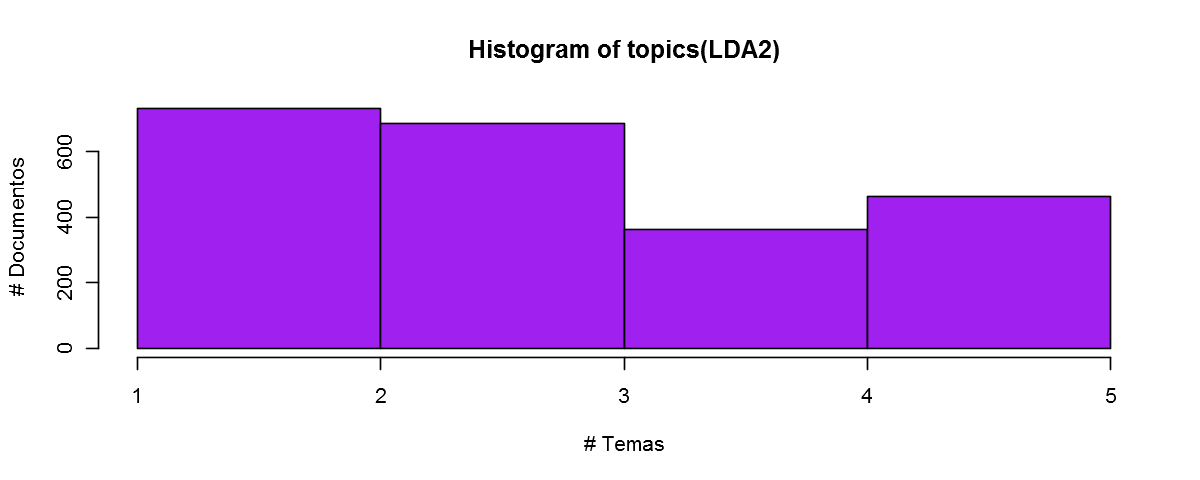

In [11]:
## Histograma de frecuencia LDA2
options(repr.plot.width=10, repr.plot.height=4)

hist(topics(LDA2),                        # Datos
     breaks=5,                            # Particiones
     xlab="# Temas",                      # Nombre del eje x 
     ylab="# Documentos",                 # Nombre del eje y
     col="purple")                        # Color de las barras 

In [12]:
## Tópicos

terms(LDA)
terms(LDA2)

Topic 1      Topic 2      Topic 3      Topic 4      Topic 5 
      "bush"    "percent" "government"        "air"          "i"

Topic 1   Topic 2   Topic 3   Topic 4   Topic 5 
"million"  "soviet"       "i" "percent"    "bush"


---

# Aplicación 2
[Contenido](#Contenido)



> [`tm {tm}`](https://cran.r-project.org/web/packages/tm/tm.pdf) 


> [`SnowballC {SnowballC}`](https://cran.r-project.org/web/packages/SnowballC/SnowballC.pdf) 


El comienzo del ejerecicio es para realizar el preprocesamiento de los datos, posteriormente se realizará el modelado de tópicos.

In [1]:
## Instale y cargue las siguientes librerias

library(tm)
library(SnowballC)

Warning message:
: package 'tm' was built under R version 3.3.2Loading required package: NLP
Warning message:
: package 'NLP' was built under R version 3.3.2Warning message:
: package 'SnowballC' was built under R version 3.3.2

In [2]:
## Direccionar el directorio a la carpeta
setwd("topicmodel/")

In [3]:
## Obtener lista de archivos con extensión .txt
filenames  <- list.files(getwd(),pattern="*.txt")

## Leer los archivos en un vector de caracteres
files      <- lapply(filenames,readLines)

> [`Corpus {tm}`](https://www.rdocumentation.org/packages/tm/versions/0.3-1/topics/Corpus) 

In [4]:
## Creación 'Corpus' del vector de caracteres
docs       <- Corpus(VectorSource(files))

## Mostar archivo 2 (bigdata)
writeLines(as.character(docs[[2]]))



c("Big Data metaphors we live by", "", "", "When Big Data metaphors erase human sensemaking, and the ways in which values are baked into categories, algorithms and visualizations, we have indeed lost the plot, not found it ", "", "Quoted from my essay on metaphors for Big Data, co-written with Simon Buckingham Shum:", "")


In [5]:
## Transformar contenido para poner todo en minuscula

docs <-tm_map(docs,                           # Datos formato 'Corpus'
              content_transformer(tolower))   # Transformación 


In [6]:
## Retirar simbolos que puedan afectar el estudio

toSpace <- content_transformer(function(x, pattern){
    return (gsub(pattern," ", x))
    }
                              )

docs <- tm_map(docs, toSpace, "-")
docs <- tm_map(docs, toSpace, "’")
docs <- tm_map(docs, toSpace, "‘")
docs <- tm_map(docs, toSpace, "•")
docs <- tm_map(docs, toSpace, "“")
docs <- tm_map(docs, toSpace, "”")


In [7]:
## Retirar puntuación
docs <- tm_map(docs, removePunctuation)

## Remover números
docs <- tm_map(docs, removeNumbers)

## Remover palabras 
docs <- tm_map(docs, removeWords, stopwords("english"))

## Remover espacios en blanco
docs <- tm_map(docs, stripWhitespace)

## Mostar archivo 2 (bigdata) con las transformaciones realizadas
writeLines(as.character(docs[[2]]))

cbig data metaphors live big data metaphors erase human sensemaking ways values baked categories algorithms visualizations indeed lost plot found  quoted essay metaphors big data co written simon buckingham shum 


In [8]:
## Guardar documento
docs   <- tm_map(docs,stemDocument)

In [9]:
## Arreglar errores de sintaxis en ingles y generales

docs <- tm_map(docs, content_transformer(gsub),
               pattern = "organiz", replacement = "organ")

docs <- tm_map(docs, content_transformer(gsub),
               pattern = "organis", replacement = "organ")

docs <- tm_map(docs, content_transformer(gsub),
               pattern = "andgovern", replacement = "govern")

docs <- tm_map(docs, content_transformer(gsub),
               pattern = "inenterpris", replacement = "enterpris")

docs <- tm_map(docs, content_transformer(gsub),
               pattern = "team-", replacement = "team")

In [10]:
## Definir conjunto de palabras para removerlas

myStopwords <- c("can", "say","one","way","use",
                     "also","howev","tell","will",
                     "much","need","take","tend",
                     "even","like","particular",
                     "rather","said","get","well",
                     "make","ask","come","end",
                     "first","two","help","often",
                     "may","might","see","someth",
                     "thing","point","post","look",
                     "right","now","think","‘ve ",
                     "‘re ","anoth","put","set",
                     "new","good","want","sure",
                     "kind","larg","yes,","day",
                     "etc","quit","sinc","attempt",
                     "lack","seen","awar","littl",
                     "ever","moreov","though","found",
                     "abl","enough","far","earli",
                     "away","achiev","draw","last",
                     "never","brief","bit","entir",
                     "brief","great","lot")

## Remover palabras
docs <- tm_map(docs, removeWords, myStopwords)

## Mostar archivo 2 (bigdata) con las transformaciones realizadas
writeLines(as.character(docs[[2]]))

cbig data metaphor live big data metaphor eras human sensemak  valu bake categori algorithm visual inde lost plot   quot essay metaphor big data co written simon buckingham shum



> [` DocumentTermMatrix{tm}`](https://cran.r-project.org/web/packages/tm/tm.pdf) 

In [15]:
## Crear documento tipo matriz de conjunto de datos
dtm           <- DocumentTermMatrix(docs)

## Nombre de filas como nombre de archivos
rownames(dtm) <- filenames

## Sumar sobre columnas
freq          <- colSums(as.matrix(dtm))

## Longitud = numero total de terminos
length(freq)

[1] 3821

In [16]:
## Ordenar de manera descendiente
ord <- order(freq,decreasing=TRUE)

## Lista de los terminos
head(freq[ord])     # Primeros terminos
tail(freq[ord])     # últimos terminos


organ   manag    work  system project problem 
    277     231     211     192     188     173

therebi timeorgan  twilling  uncommit  unionist   workday 
        1         1         1         1         1         1

In [17]:
## Guardar terminos en un archivo CSV
write.csv(freq[ord],"word_freq.csv")   # Puede ver los datos en la carpeta de directorio que definio al comienzo

Modelado

In [18]:
## Instale y cargue las siguientes librerias

library(topicmodels)

Warning message:
: package 'topicmodels' was built under R version 3.3.2

In [19]:
## Definición de parametros

burnin <- 4000
iter   <- 2000
thin   <- 500
seed   <-list(2003,5,63,100001,765)
nstart <- 5


## Número de tópicos
k      <- 5


> [` LDA {topicmodels}`](https://cran.r-project.org/web/packages/topicmodels/topicmodels.pdf) 

In [27]:
## Modelado

ldaOut <-LDA(dtm,                           # data
             k,                             # Número de tópicos   
             method="Gibbs",                # Método de ajuste
             control=list(nstart=nstart,    # Control de parametros
                          seed = seed,
                          best=T,
                          burnin = burnin, 
                          iter = iter,
                          thin=thin))

In [22]:
## Tópicos asociados a cada artchivo
ldaOut.topics <- as.matrix(topics(ldaOut))            

## Guardar salida en archivo CSV
write.csv(ldaOut.topics,
          file=paste("LDAGibbs",k,"DocsToTopics.csv"))



In [25]:
ldaOut.topics

BeyondEntitiesAndRelationships.txt,1
bigdata.txt,1
ConditionsOverCauses.txt,4
EmergentDesignInEnterpriseIT.txt,4
FromInformationToKnowledge.txt,3
FromTheCoalface.txt,5
HeraclitusAndParmenides.txt,2
IroniesOfEnterpriseIT.txt,5
MakingSenseOfOrganizationalChange.txt,2
MakingSenseOfSensemaking.txt,3
ObjectivityAndTheEthicalDimensionOfDecisionMaking.txt,2


In [23]:
## 6 primeros terminos por cada tópico
ldaOut.terms <- as.matrix(terms(ldaOut,6))
write.csv(ldaOut.terms,
          file=paste("LDAGibbs",k,"TopicsToTerms.csv"))



In [26]:
ldaOut.terms

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
data,chang,question,system,enterpris
model,decis,map,project,organ
differ,problem,time,manag,consult
view,organ,ibi,organ,work
busi,consequ,issu,process,flexibl
practic,uncertainti,exampl,design,manag


---

**Ejercicio.--** El siguiente conjunto de datos contiene 229 archivos de texto donde cada uno tiene el resumen de un artículo cientifico. Realice un modelado de tópicos para este conjunto de datos utilizando las técnicas presentadas en este notebook.


[Datos](https://drive.google.com/file/d/0B4psHlllKLPUQjNyUlFWUjZubmM/view?usp=sharing)

---

[Contenido](#Contenido)
